In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Single harmonic oscillator

In [2]:
freq = 2.  # Hz
omega = 2. * np.pi * freq

tmax = 3  # s
Nt = 1000
tv = np.linspace(0., tmax, Nt)

def f(X, t):
    x, dotx = X
    ddotx = -omega**2 * x
    return [dotx, ddotx]

In [3]:
%%time
X = odeint(f, [1., 0.], tv)

CPU times: user 1.9 ms, sys: 330 µs, total: 2.23 ms
Wall time: 1.98 ms


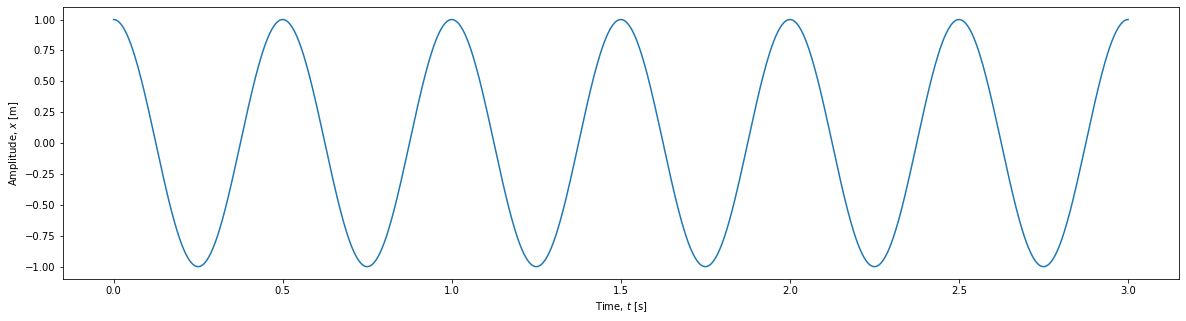

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(tv, X[:, 0], "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# Phase model

In [5]:
def fp(p, t):
    dotp = omega * Nt
    return dotp

In [6]:
%%time
Phi = odeint(fp, np.pi/2, tv)

CPU times: user 317 µs, sys: 194 µs, total: 511 µs
Wall time: 344 µs


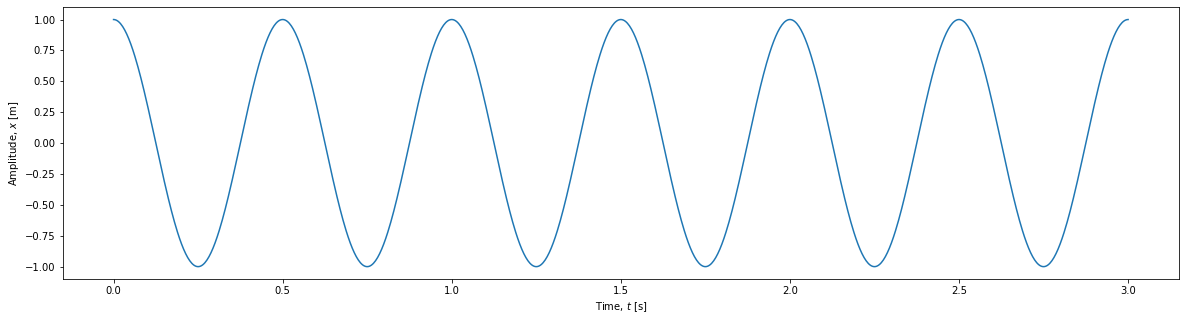

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# Two oscillators

In [8]:
N_osc = 2

Omega = omega + np.random.randn(N_osc)/1000
Noise = 0.5 * np.ones(N_osc)
Coupling = 0.5 * np.ones(N_osc)

In [9]:
def fp(p, t):
    dotp = Omega * Nt * np.ones(2) + Noise * np.random.randn() # + C (coupling term)
    return dotp

In [10]:
%%time
Phi = odeint(fp, 2 * np.pi * np.random.rand(2), tv)

CPU times: user 16.8 ms, sys: 678 µs, total: 17.5 ms
Wall time: 17 ms


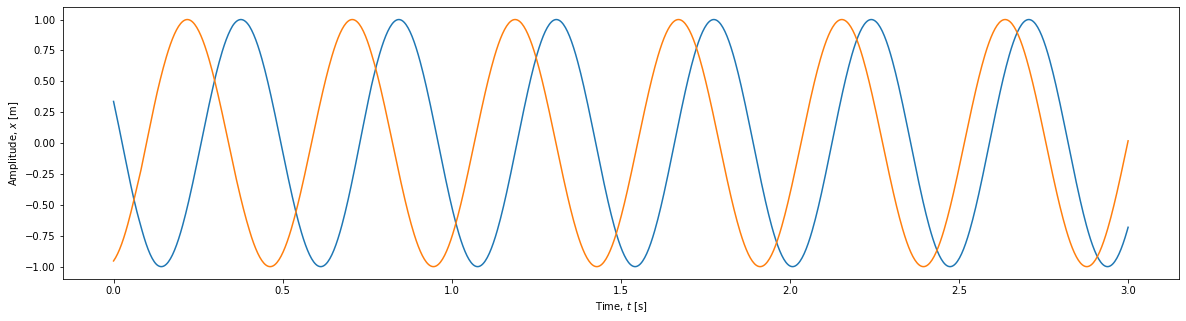

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()